In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('AmesHousing.csv')
df.head()

C:\Users\Moham\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
df.info()
print(df['Overall Qual'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
# Existing columns to drop
columns_to_drop = [
    'Alley',
    'Fireplace Qu',
    'Garage Qual',
    'Garage Cond',
    'Garage Type',
    'Garage Yr Blt',
    'Garage Finish',
    'Pool QC',
    'Fence',
    'Misc Feature',
    'Bsmt Cond',      
    'BsmtFin Type 2',
    'Street', 
    'Utilities',
    'Heating',
    'Mas Vnr Type'
]

# Dropping irrelevant columns
df_cleaned = df.drop(columns=columns_to_drop)

# Filling missing values for Lot Frontage and Mas Vnr Area
df_cleaned['Lot Frontage'].fillna(df_cleaned['Lot Frontage'].median(), inplace=True)
df_cleaned['Mas Vnr Area'].fillna(df_cleaned['Mas Vnr Area'].median(), inplace=True)

# Fill missing values for important basement-related features
df_cleaned['Bsmt Qual'].fillna('None', inplace=True)
df_cleaned['Bsmt Exposure'].fillna('None', inplace=True)
df_cleaned['BsmtFin Type 1'].fillna('None', inplace=True)
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Lot Shape        2930 non-null   object 
 7   Land Contour     2930 non-null   object 
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   object 
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

C:\Users\Moham\AppData\Local\Temp\ipykernel_14472\2996309667.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Lot Frontage'].fillna(df_cleaned['Lot Frontage'].median(), inplace=True)
C:\Users\Moham\AppData\Local\Temp\ipykernel_14472\2996309667.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [4]:
le = LabelEncoder()

# List of columns for Label Encoding (ordinal data)
label_encode_cols = [
    'Lot Shape', 'Land Contour', 'Land Slope', 'Exter Qual', 'Exter Cond',
    'Heating QC', 'Kitchen Qual', 'Functional', 'Paved Drive',
    'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1'
]

for col in label_encode_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    
print(df_cleaned.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Lot Shape        2930 non-null   int32  
 7   Land Contour     2930 non-null   int32  
 8   Lot Config       2930 non-null   object 
 9   Land Slope       2930 non-null   int32  
 10  Neighborhood     2930 non-null   object 
 11  Condition 1      2930 non-null   object 
 12  Condition 2      2930 non-null   object 
 13  Bldg Type        2930 non-null   object 
 14  House Style      2930 non-null   object 
 15  Overall Qual     2930 non-null   int64  
 16  Overall Cond     2930 non-null   int64  
 17  Year Built    

In [5]:
# List of columns for One-Hot Encoding
one_hot_encode_cols = [
    'MS Zoning', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2',
    'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st',
    'Exterior 2nd', 'Foundation', 'Central Air', 'Electrical', 'Sale Type',
    'Sale Condition'
]

# Filter columns that exist in the current dataframe
valid_one_hot_cols = [col for col in one_hot_encode_cols if col in df_cleaned.columns]

# Apply One-Hot Encoding only for valid nominal columns
df_cleaned = pd.get_dummies(df_cleaned, columns=valid_one_hot_cols, drop_first=True)

# Verify the changes
df_cleaned.head()


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Lot Shape,Land Contour,Land Slope,Overall Qual,Overall Cond,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,0,3,0,6,5,...,False,False,False,False,True,False,False,False,True,False
1,2,526350040,20,80.0,11622,3,3,0,5,6,...,False,False,False,False,True,False,False,False,True,False
2,3,526351010,20,81.0,14267,0,3,0,6,6,...,False,False,False,False,True,False,False,False,True,False
3,4,526353030,20,93.0,11160,3,3,0,7,5,...,False,False,False,False,True,False,False,False,True,False
4,5,527105010,60,74.0,13830,0,3,0,5,5,...,False,False,False,False,True,False,False,False,True,False


In [6]:
correlation_matrix = df_cleaned.corr()

target_correlation = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(target_correlation)

SalePrice            1.000000
Overall Qual         0.799262
Gr Liv Area          0.706780
Garage Cars          0.647877
Garage Area          0.640401
                       ...   
Foundation_CBlock   -0.349642
Heating QC          -0.425473
Bsmt Qual           -0.577108
Kitchen Qual        -0.613689
Exter Qual          -0.647616
Name: SalePrice, Length: 180, dtype: float64


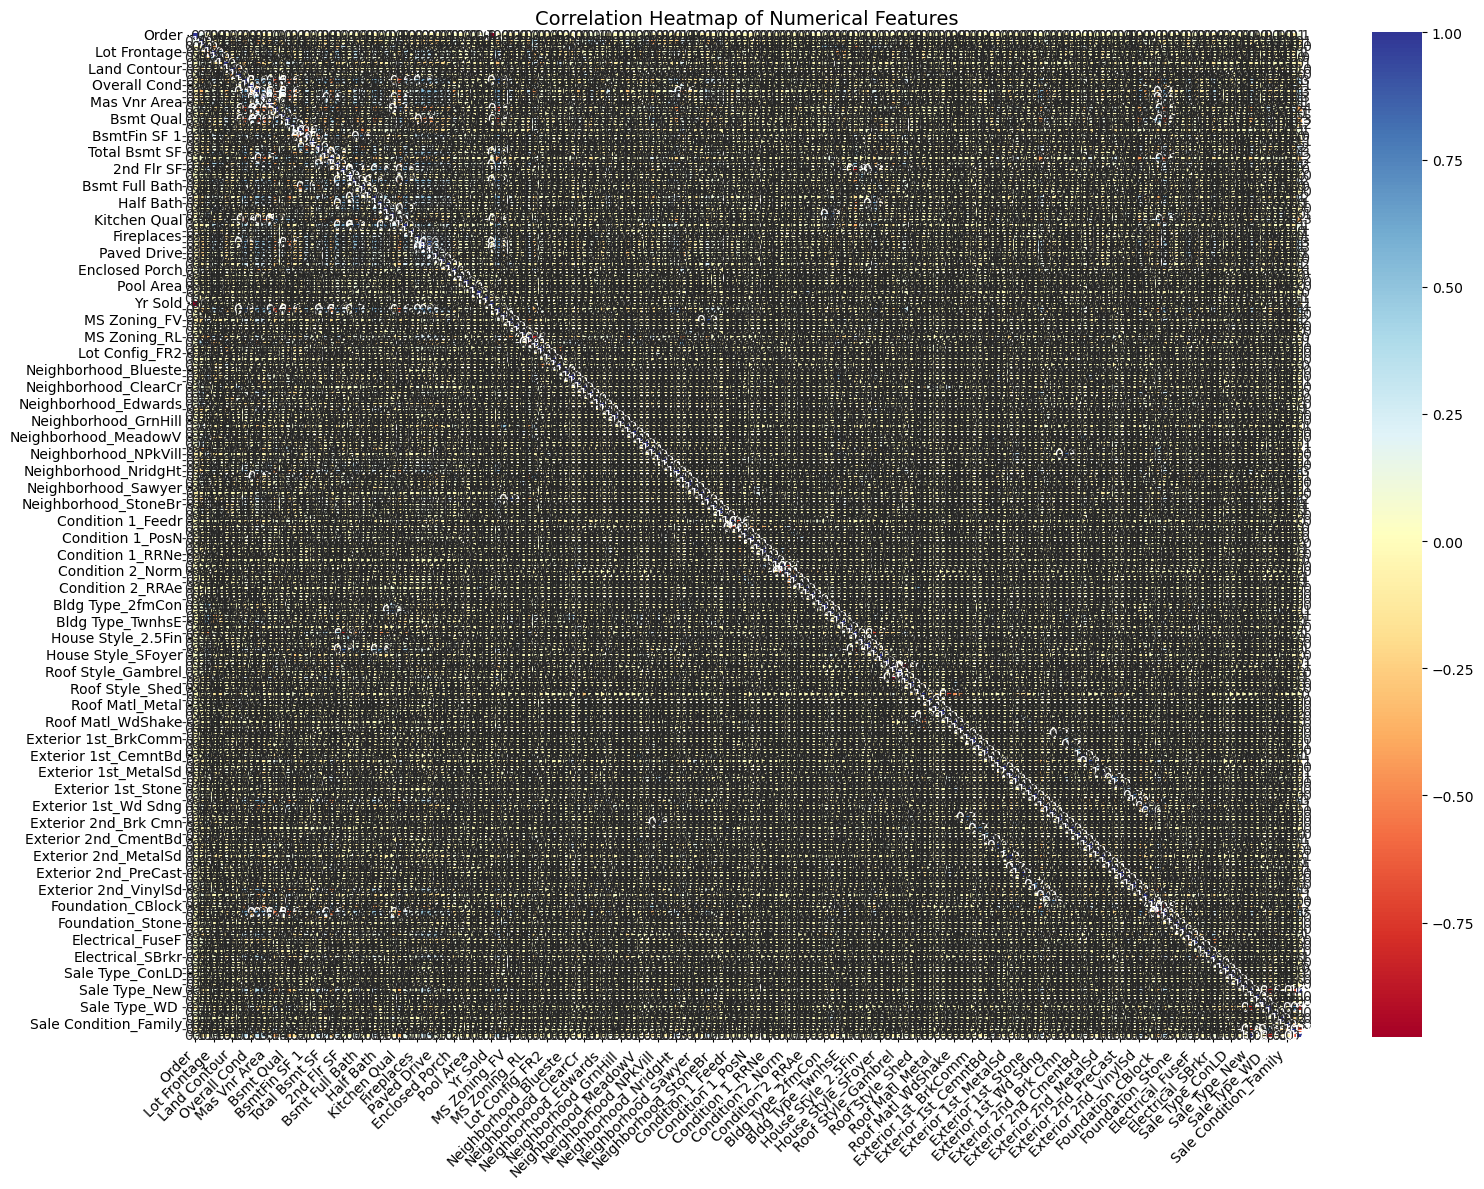

In [7]:
# Step 1: Correlation heatmap of numerical features
plt.figure(figsize=(16, 12))  # Økt størrelse for bedre lesbarhet
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu", fmt=".1f", linewidths=0.5,
            annot_kws={"size": 10})  # Redusere antall desimaler og endre tekststørrelsen
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotere x-akse etiketter
plt.yticks(fontsize=10)  # Endre skriftstørrelsen på y-akse etikettene
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)  # Justere tittelstørrelsen
plt.tight_layout()  # Justere layout for å unngå overlapping
plt.show()


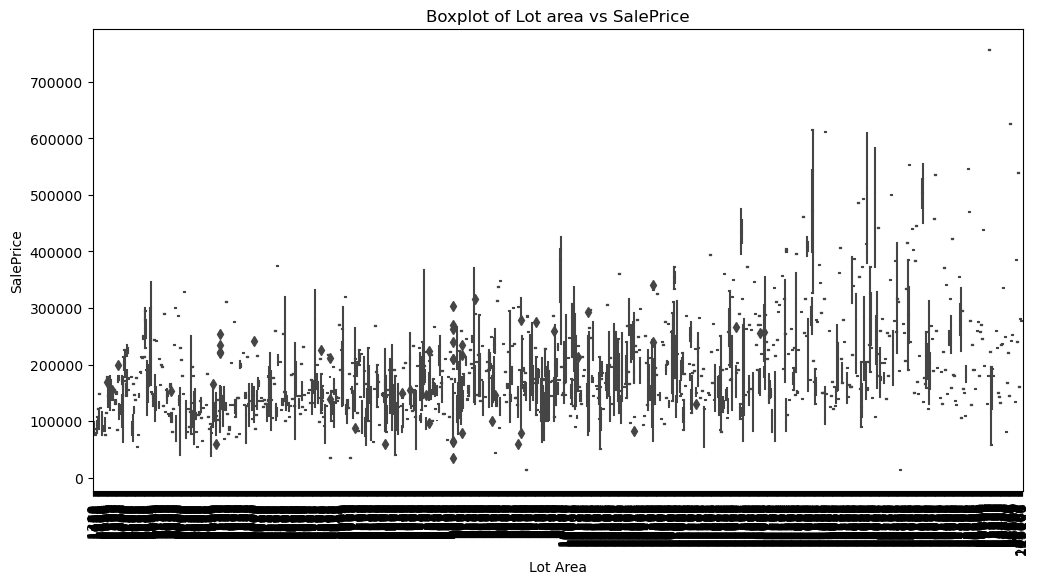

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Lot Area', y='SalePrice', data=df_cleaned)
plt.title('Boxplot of Lot area vs SalePrice')
plt.xticks(rotation=90)
plt.show()

C:\Users\Moham\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


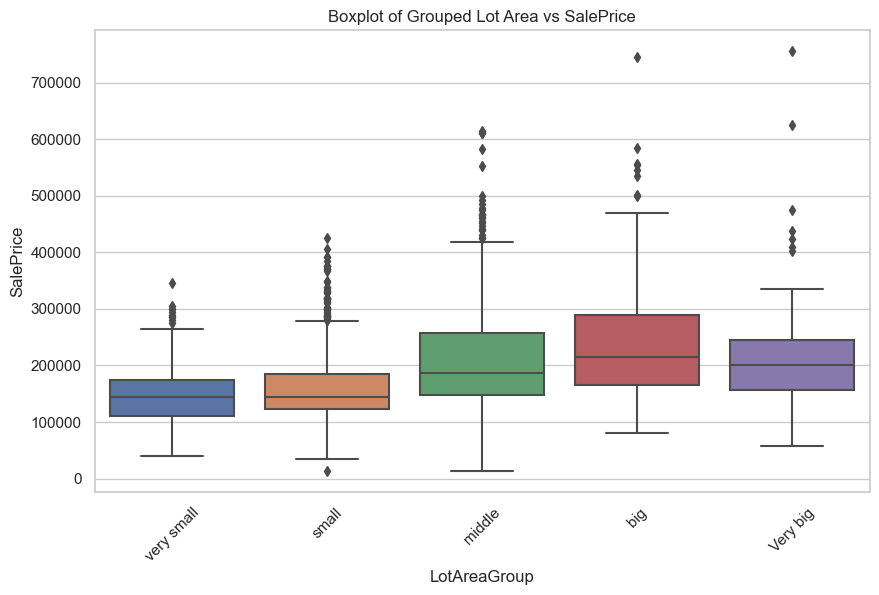

In [14]:
bins = [0, 5000, 10000, 15000, 20000, 50000] 
labels = ['very small', 'small', 'middle', 'big', 'Very big']

df_cleaned['LotAreaGroup'] = pd.cut(df_cleaned['Lot Area'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='LotAreaGroup', y='SalePrice', data=df_cleaned)
plt.title('Boxplot of Grouped Lot Area vs SalePrice')
plt.xticks(rotation=45)
plt.show()

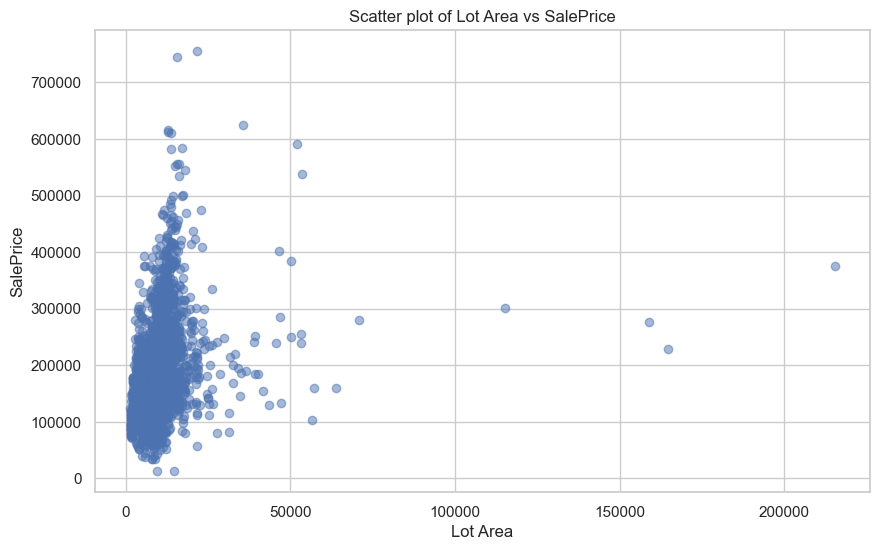

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Lot Area'], df_cleaned['SalePrice'], alpha=0.5)
plt.title('Scatter plot of Lot Area vs SalePrice')
plt.xlabel('Lot Area')
plt.ylabel('SalePrice')
plt.show()


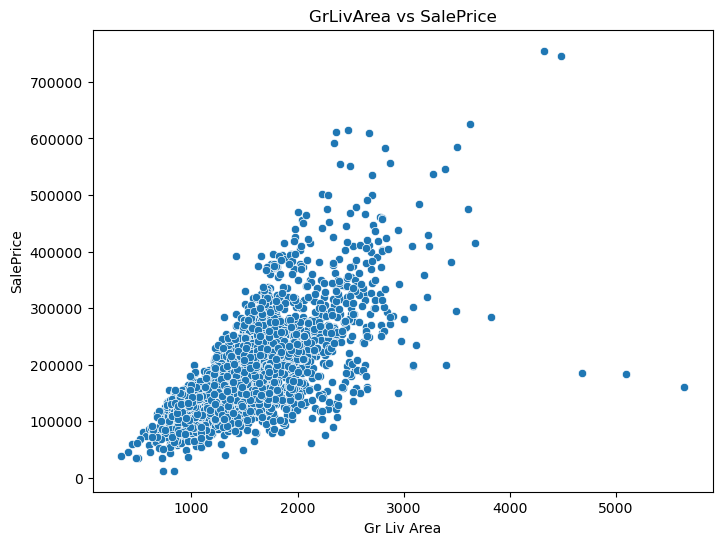

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()

C:\Users\Moham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


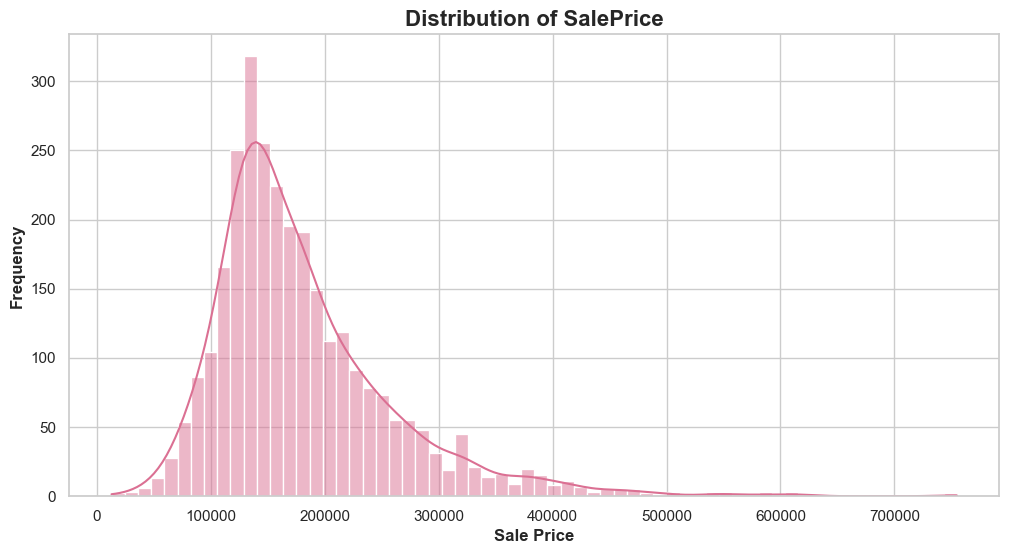

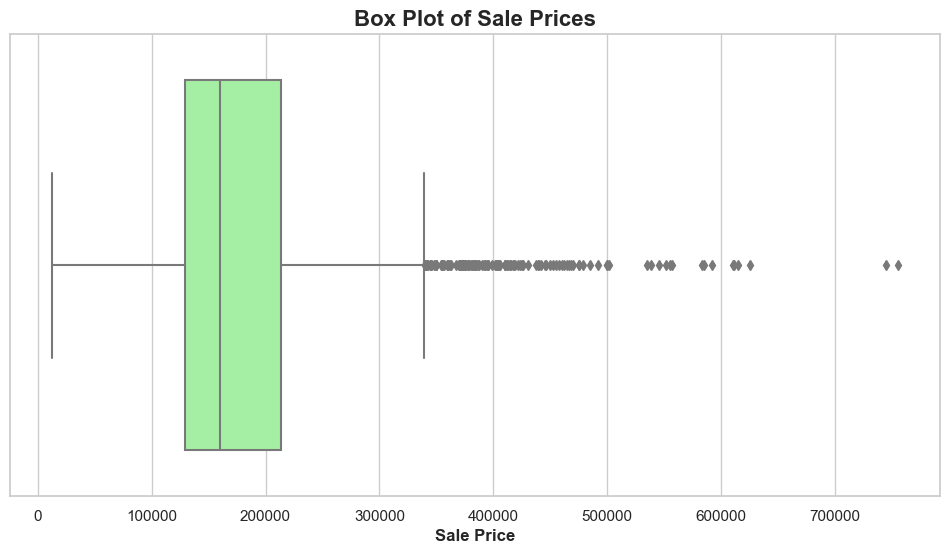

In [10]:
sns.set(style="whitegrid")

# Histogram of Sale Prices
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, color='#DB7093')
plt.title('Distribution of SalePrice', weight='bold', fontsize=16)
plt.xlabel('Sale Price', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.show()

# Box Plot of Sale Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='SalePrice', data=df, color='#98FB98')
plt.title('Box Plot of Sale Prices', weight='bold', fontsize=16)
plt.xlabel('Sale Price', weight='bold')
plt.show();

C:\Users\Moham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Moham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


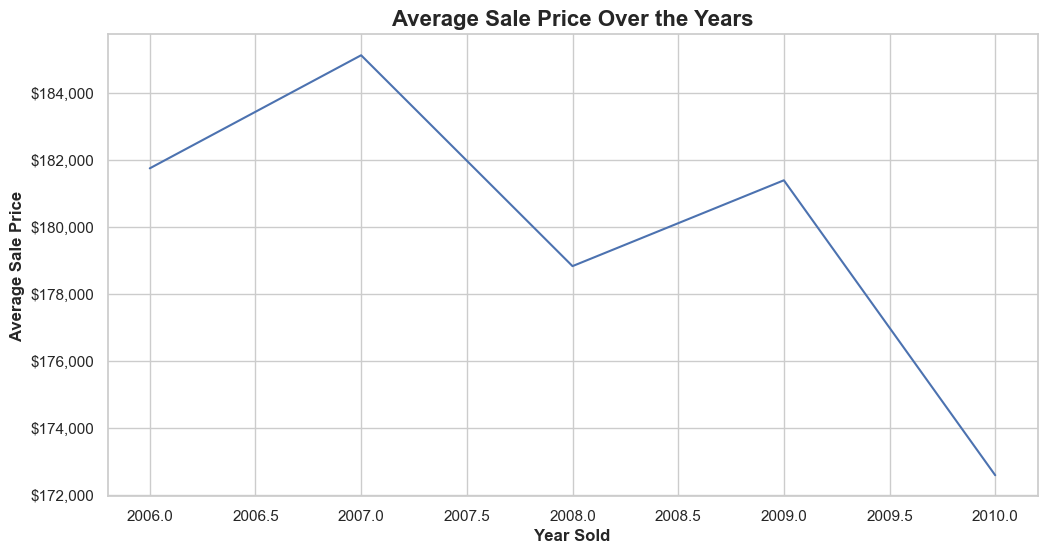

In [11]:
yearly_avg = df.groupby('Yr Sold')['SalePrice'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_avg.index, y=yearly_avg.values)
plt.title('Average Sale Price Over the Years', weight='bold', fontsize=16)
plt.xlabel('Year Sold', weight='bold')
plt.ylabel('Average Sale Price', weight='bold')

# Format y-axis labels
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))

plt.show()


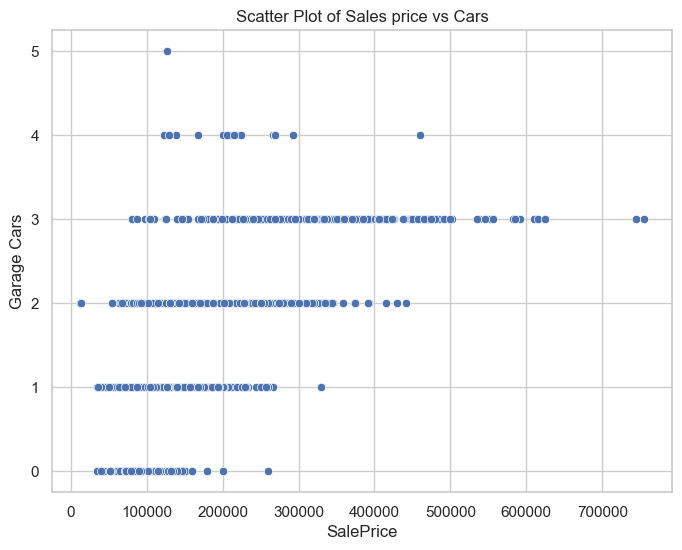

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: plotting scatter between two highly correlated features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned['SalePrice'], y=df_cleaned['Garage Cars'])
plt.title('Scatter Plot of Sales price vs Cars')
plt.show()
